In [1]:
import requests
from bs4  import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sports_teams = {
    'mens_volleyball': [
        'https://ccnyathletics.com/sports/mens-volleyball/roster?view=2',
        'https://lehmanathletics.com/sports/mens-volleyball/roster?view=2',
        'https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster?view=2',
        'https://johnjayathletics.com/sports/mens-volleyball/roster?view=2',
        'https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster?view=2',
        'https://mecathletics.com/sports/mens-volleyball/roster?view=2',
        'https://www.huntercollegeathletics.com/sports/mens-volleyball/roster?view=2',
        'https://yorkathletics.com/sports/mens-volleyball/roster?view=2',
        'https://ballstatesports.com/sports/mens-volleyball/roster?view=2'
    ],
    'womens_volleyball': [
        'https://bmccathletics.com/sports/womens-volleyball/roster?view=2',
        'https://yorkathletics.com/sports/womens-volleyball/roster?view=2',
        'https://hostosathletics.com/sports/womens-volleyball/roster?view=2',
        'https://bronxbroncos.com/sports/womens-volleyball/roster/2021?view=2',
        'https://queensknights.com/sports/womens-volleyball/roster?view=2',
        'https://augustajags.com/sports/wvball/roster?view=2',
        'https://flaglerathletics.com/sports/womens-volleyball/roster?view=2',
        'https://pacersports.com/sports/womens-volleyball/roster?view=2',
        'https://www.golhu.com/sports/womens-volleyball/roster?view=2'
    ],
    'mens_swimming_diving': [
        'https://csidolphins.com/sports/mens-swimming-and-diving/roster/2023-2024?view=2',
        'https://yorkathletics.com/sports/mens-swimming-and-diving/roster?view=2',
        'https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster?view=2',
        'https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster?view=2',
        'https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster?view=2',
        'https://mckbearcats.com/sports/mens-swimming-and-diving/roster?view=2',
        'https://ramapoathletics.com/sports/mens-swimming-and-diving/roster?view=2',
        'https://oneontaathletics.com/sports/mens-swimming-and-diving/roster?view=2',
        'https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22?view=2',
        'https://albrightathletics.com/sports/mens-swimming-and-diving/roster/2021-22?view=2'
    ],
    'womens_swimming_diving': [
        'https://csidolphins.com/sports/womens-swimming-and-diving/roster?view=2',
        'https://queensknights.com/sports/womens-swimming-and-diving/roster?view=2',
        'https://yorkathletics.com/sports/womens-swimming-and-diving/roster?view=2',
        'https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim&view=2',
        'https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster?view=2',
        'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster?view=2',
        'https://mckbearcats.com/sports/womens-swimming-and-diving/roster?view=2',
        'https://ramapoathletics.com/sports/womens-swimming-and-diving/roster?view=2',
        'https://keanathletics.com/sports/womens-swimming-and-diving/roster?view=2',
        'https://oneontaathletics.com/sports/womens-swimming-and-diving/roster?view=2'
    ]
}

In [4]:
def process_data(urls):

  names = []
  heights = []

  for url in urls:
    page = requests.get(url)
    if page.status_code == 200:

      soup = BeautifulSoup(page.content, 'html.parser')

      name_tags = soup.find_all('td', class_='sidearm-table-player-name')
      height_tags = soup.find_all('td', class_='height')

      min_length = min(len(name_tags), len(height_tags))

      for i in range(min_length):
          name_tag = name_tags[i]
          height_tag = height_tags[i]

          names.append(name_tag.get_text().strip())

          raw_height = height_tag.get_text().strip()

          if '-' in raw_height:
              parts = raw_height.split('-')
              if len(parts) == 2 and parts[0] and parts[1]:
                  try:
                      feet = float(parts[0]) * 12
                      inches = float(parts[1])
                      inches_height = feet + inches
                      heights.append(inches_height)
                  except ValueError:
                      heights.append(None)
              else:
                  heights.append(None)
          else:
              heights.append(None)

      if len(name_tags) > min_length:
          for _ in range(len(name_tags) - min_length):
              heights.append(None)
      elif len(height_tags) > min_length:
           for _ in range(len(height_tags) - min_length):
               names.append(None)

  data = {
      'Names': names,
      'Heights' : heights
  }
  df = pd.DataFrame(data)
  valid_heights = [h for h in heights if h is not None]
  avg_height = sum(valid_heights) / max(len(valid_heights), 1)
  df['Heights'] = df['Heights'].fillna('None')

  return df, avg_height

In [5]:
mens_volleyball_df, mens_volleyball_avg_height = process_data(sports_teams['mens_volleyball'])

In [6]:
mens_volleyball_df

,Names,Heights
0,Shakib Delowar,71.0
1,Brandon Green,72.0
2,Reng Chen,69.0
3,Anirudha Das,68.0
4,Gabriel Linus,75.0
...,...,...
98,George Molina,72.0
99,Stanley Sanchez,68.0
100,Sebastian Gomez,76.0
101,"David Heyliger, Jr.",73.0


In [7]:
mens_volleyball_avg_height

71.2135922330097

In [8]:
womens_volleyball_df, womens_volleyball_avg_height = process_data(sports_teams['womens_volleyball'])

In [9]:
womens_volleyball_df

,Names,Heights
0,Jasmine Vega,61.0
1,Samantha Panameno,65.0
2,Simranjit Kaur,63.0
3,Jasmine Dias,59.0
4,Devina Luckhoo,63.0
...,...,...
117,Erin Ferello,65.0
118,Alyssa Daley,75.0
119,Myka Costanzo,64.0
120,Kyleigh McDermit,71.0


In [10]:
womens_volleyball_avg_height

68.2072072072072

In [11]:
mens_swimming_diving_df, mens_swimming_diving_avg_height = process_data(sports_teams['mens_swimming_diving'])

In [12]:
mens_swimming_diving_df

,Names,Heights
0,Anthony Attenborough,70.0
1,James Curran,69.0
2,Charles Cusumano,64.0
3,David Fayngersh,70.0
4,Michael Graham,70.0
...,...,...
189,Kieran Hassard,72.0
190,Anthony Laite,69.0
191,Drew MacDonald,72.0
192,Kyle Morken,73.0


In [13]:
mens_swimming_diving_avg_height

71.07865168539325

In [14]:
womens_swimming_diving_df, womens_swimming_diving_avg_height = process_data(sports_teams['womens_swimming_diving'])

In [15]:
womens_swimming_diving_df

,Names,Heights
0,Aurelia Barbagallo,None
1,Nicole Conroy,None
2,Jacqueline DeFranco,None
3,Alexis Doyle,None
4,Katherine Ebrahim,None
...,...,...
138,Paige Splendido,65.0
139,Callie Stinson,64.0
140,Alyssa Thompson,67.0
141,Avery Tomandl,None


In [16]:
womens_swimming_diving_avg_height

65.75206611570248

In [34]:
def get_all_heights(df, sport_labels):
  shortest_heights = df['Heights'].nsmallest(5).unique()
  fifth_shortest = shortest_heights[-1]
  shortest_athletes = df[df['Heights'] <= fifth_shortest][['Names', 'Heights']]
  print(f'Shortest {sport_labels}: \n', shortest_athletes)

  tallest_heights = df['Heights'].nlargest(5).unique()
  fifth_tallest = tallest_heights[-1]
  tallest_athletes = df[df['Heights'] >= fifth_tallest][['Names', 'Heights']]
  print(f'Tallest {sport_labels}:\n', tallest_athletes)

get_all_heights(mens_swimming_diving_df, "Men's Swimming")
get_all_heights(womens_swimming_diving_df, "Women's Swimming")
get_all_heights(mens_volleyball_df, "Men's Volleyball")
get_all_heights(womens_volleyball_df, "Women's Volleyball")

Shortest Men's Swimming: 
                 Names  Heights
2    Charles Cusumano     64.0
34        Samuel Liao     65.0
36       Eric Mayzlin     65.0
45          Stuart Xu     65.0
96    Miles Fleischer     63.0
103       Wyatt Kurtz     65.0
Tallest Men's Swimming:
                     Names  Heights
70      Mattia Giurgevich     76.0
83          Adam Szczerba     76.0
100         Colton Grimes     78.0
116        Michael Stooke     76.0
118  Domantas  Tarnauskas     77.0
120           Tyson Upton     79.0
125          Tyler Finkle     76.0
134             Joe Swede     76.0
157         Gavin Weseman     76.0
167         Brian Harding     76.0
171            Eric Kroon     77.0
187     Nicholas Griffith     76.0
Shortest Women's Swimming: 
                  Names  Heights
12          Asha Besaw     61.0
18      Kristen Flores     61.0
22   Melanie Rodriguez     59.0
23         Nakia Usher     58.0
24         Julia Wyman     58.0
28          Amanda Lee     61.0
103     Camila Mercado 

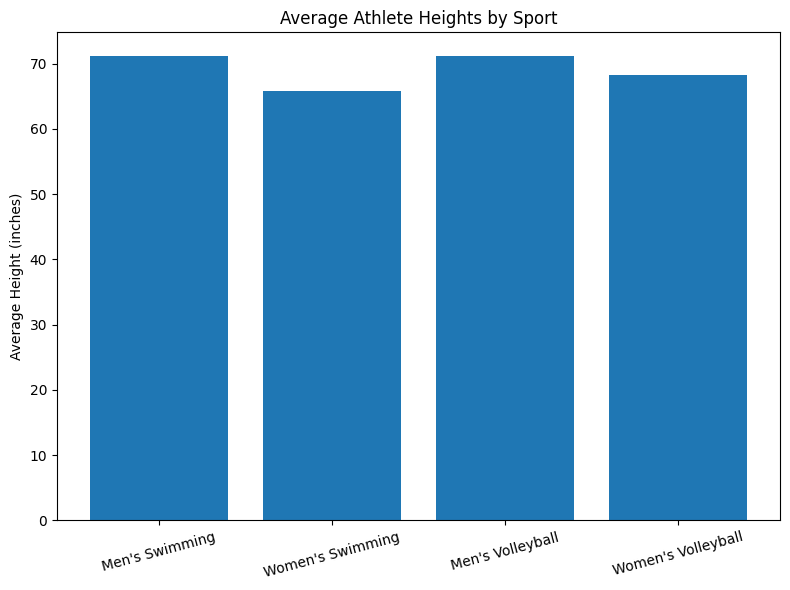

In [36]:
import matplotlib.pyplot as plt

averages = {
    "Men's Swimming": mens_swimming_diving_df['Heights'].mean(),
    "Women's Swimming": womens_swimming_diving_df['Heights'].mean(),
    "Men's Volleyball": mens_volleyball_df['Heights'].mean(),
    "Women's Volleyball": womens_volleyball_df['Heights'].mean()
}

plt.figure(figsize=(8,6))
plt.bar(averages.keys(), averages.values())
plt.ylabel('Average Height (inches)')
plt.title('Average Athlete Heights by Sport')
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('appendix_avg_heights.png')
plt.show()

In [45]:
import sqlite3

conn = sqlite3.connect('athlete_heights.db')

mens_swimming_diving_df.to_sql('mens_swimming', conn, if_exists='replace', index=False)
womens_swimming_diving_df.to_sql('womens_swimming', conn, if_exists='replace', index=False)
mens_volleyball_df.to_sql('mens_volleyball', conn, if_exists='replace', index=False)
womens_volleyball_df.to_sql('womens_volleyball', conn, if_exists='replace', index=False)

cursor = conn.cursor()
cursor.execute('SELECT name FROM sqlite_master WHERE type="table";')
print('Tables in database:', cursor.fetchall())

conn.commit()
conn.close()

Tables in database: [('mens_swimming',), ('womens_swimming',), ('mens_volleyball',), ('womens_volleyball',)]
